In [1]:
import pandas as pd

early_stage_path = '附件2：EarlyStage_exp.csv'
early_stage_data = pd.read_csv(early_stage_path)

later_stage_path = '附件3：LaterStage_exp.csv'
later_stage_data = pd.read_csv(later_stage_path)

early_stage_data.head(), later_stage_data.head()

(  Unnamed: 0  TCGA-BH-A0BQ-01  TCGA-BH-A0W7-01  TCGA-BH-A0HA-01  \
 0  ARHGEF10L              639              754              895   
 1      RNF10             4001             4056             5426   
 2      RNF11             2721             1833             2738   
 3      RNF13             1389             1057             1390   
 4    GTF2IP1             7223             7804             7345   
 
    TCGA-E2-A1II-01  TCGA-AR-A24S-01  TCGA-D8-A1XA-01  TCGA-E2-A1IJ-01  \
 0              582              575              764              929   
 1             6203             2519             4826             4121   
 2             1825             3849             3078             2206   
 3             1857             1658             1912             1425   
 4             5657             6781             5512             5299   
 
    TCGA-A7-A0DC-01  TCGA-E9-A22B-01  ...  TCGA-BH-A0C3-01  TCGA-E2-A15J-01  \
 0             1365             1054  ...              599       

### 加载数据
在这一步中，从CSV文件中加载了基因表达数据。数据包含了不同基因在多个样本中的表达水平。数据为一个矩阵，其中行代表样本，列代表基因。

### 标准化数据
标准化是将数据转换为具有零均值和单位方差的标准正态分布。通过以下公式完成：

$$ x_{\text{scaled}} = \frac{x - \text{mean}(x)}{\text{std}(x)} $$

其中，$ x_{\text{scaled}} $ 是标准化后的数据，$ x $ 是原始数据，mean($ x $) 是数据的均值，std($ x $) 是数据的标准差。标准化后的数据有助于使不同特征的尺度保持一致。

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 标准化数值数据
gene_names_early = early_stage_data.iloc[:, 0] 
early_stage_values = early_stage_data.iloc[:, 1:].values 

gene_names_later = later_stage_data.iloc[:, 0]
later_stage_values = later_stage_data.iloc[:, 1:].values

scaled_values_early = scaler.fit_transform(early_stage_values)
scaled_values_later = scaler.fit_transform(later_stage_values)

scaled_early_stage_data = pd.DataFrame(scaled_values_early, columns=early_stage_data.columns[1:], index=gene_names_early)
scaled_later_stage_data = pd.DataFrame(scaled_values_later, columns=later_stage_data.columns[1:], index=gene_names_later)

scaled_early_stage_data.head(), scaled_later_stage_data.head()


(            TCGA-BH-A0BQ-01  TCGA-BH-A0W7-01  TCGA-BH-A0HA-01  \
 Unnamed: 0                                                      
 ARHGEF10L         -0.164088        -0.160075        -0.080578   
 RNF10              0.466331         0.563564         0.451845   
 RNF11              0.226314         0.076390         0.135987   
 RNF13             -0.023453        -0.093672        -0.022413   
 GTF2IP1            1.070497         1.384946         0.677340   
 
             TCGA-E2-A1II-01  TCGA-AR-A24S-01  TCGA-D8-A1XA-01  \
 Unnamed: 0                                                      
 ARHGEF10L         -0.201555        -0.167449        -0.151653   
 RNF10              1.372377         0.203156         0.758684   
 RNF11              0.146496         0.456707         0.366939   
 RNF13              0.155457         0.039015         0.105626   
 GTF2IP1            1.219492         1.015663         0.912424   
 
             TCGA-E2-A1IJ-01  TCGA-A7-A0DC-01  TCGA-E9-A22B-01  \
 Unnam

### 主成分分析（PCA）的数学原理

1. **协方差矩阵计算**：
   首先计算数据集的协方差矩阵。协方差矩阵$ \Sigma $ 对于数据矩阵 $ X $ 是这样计算的：

   $$
   \Sigma = \frac{1}{n-1} (X - \bar{X})^\top (X - \bar{X})
   $$

   其中，$ X $ 是数据矩阵，$ \bar{X} $ 是每列的均值，$ n $ 是样本数。

2. **特征值与特征向量**：
   接下来，计算协方差矩阵的特征值和对应的特征向量。特征向量决定了PCA转换的方向，而特征值决定了各个主成分在数据变异中的重要性。对于协方差矩阵 $ \Sigma $，求解如下特征方程：

   $$
   \Sigma v = \lambda v
   $$

   其中，$ \lambda $ 是特征值，$ v $ 是对应的特征向量。

3. **选择主成分**：
   将特征值按降序排列，选择最大的几个特征值及其对应的特征向量。这些特征向量是新空间的基，通常选择的特征值对应的特征向量会解释大部分的数据变异。

4. **数据转换**：
   最后，将原始数据转换到由选定的特征向量定义的新空间。新的数据矩阵 $ Y $ 由下式计算：

   $$
   Y = Xv
   $$

   其中，$ v $ 是包含选择的主成分特征向量的矩阵。

通过这种方式，PCA帮助我们识别数据中的模式，减少数据的复杂性，同时尽可能保留重要信息.


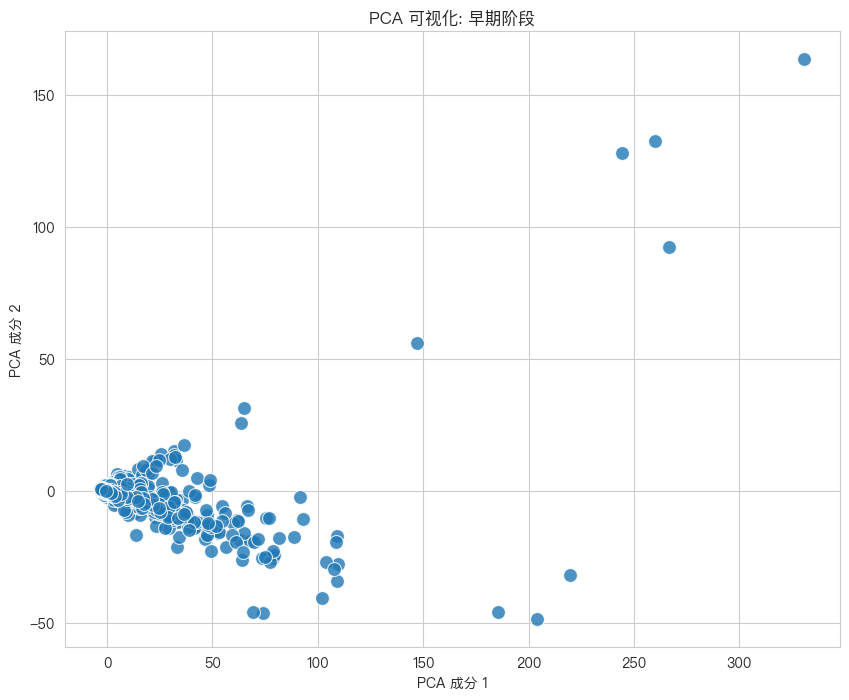

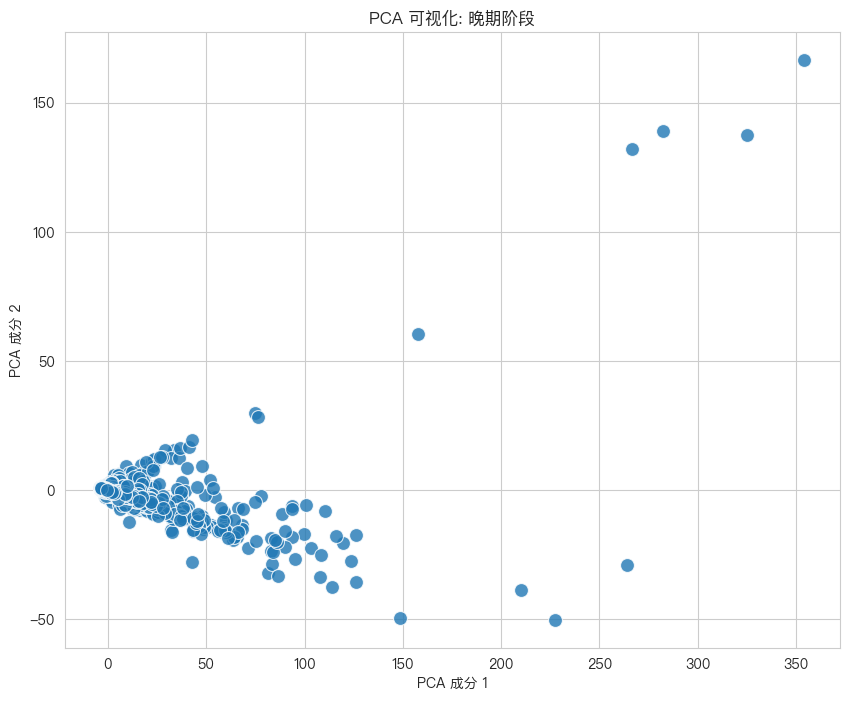

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和图像风格
font_path = '/System/Library/Fonts/PingFang.ttc' 
plt.rcParams['font.sans-serif'] = ['PingFang HK']
plt.rcParams['axes.unicode_minus'] = False

def visualize_pca(scaled_data, title):
    # PCA 可视化
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    # 绘图
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], s=100, alpha=0.8)
    plt.title(f'PCA 可视化: {title}')
    plt.xlabel('PCA 成分 1')
    plt.ylabel('PCA 成分 2')
    plt.grid(True)
    plt.show()

# 使用已经标准化的数据进行PCA可视化
visualize_pca(scaled_early_stage_data.values, '早期阶段')
visualize_pca(scaled_later_stage_data.values, '晚期阶段')


### 结论1:识别异质性的来源——主成分分析图结论：从主成分分析（PCA）中，我们观察到基因表达数据在早期和晚期患者中都是分散的，而不是聚集的。这表明基因表达水平在患者群体中具有高度的异质性。因此，PCA 是一种有效的方法来可视化和确认数据的异质性。

## 数学建模过程


### K-means 聚类
K-means ——聚类算法，用于将数据点分成K个不同的组（簇）,通过最小化每个数据点与其所属簇的质心之间的距离来实现。K-means 目标函数：

$$ \text{argmin}_{C} \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2 $$

其中，$ C $ 是簇分配的集合，$ C_i $ 是第 $ i $ 个簇的数据点集合，$ \mu_i $ 是第 $ i $ 个簇的质心。K-means 算法的基本步骤包括初始化质心、分配数据点到最近的质心、更新质心位置，重复这些步骤直到质心不再变化或达到最大迭代次数。



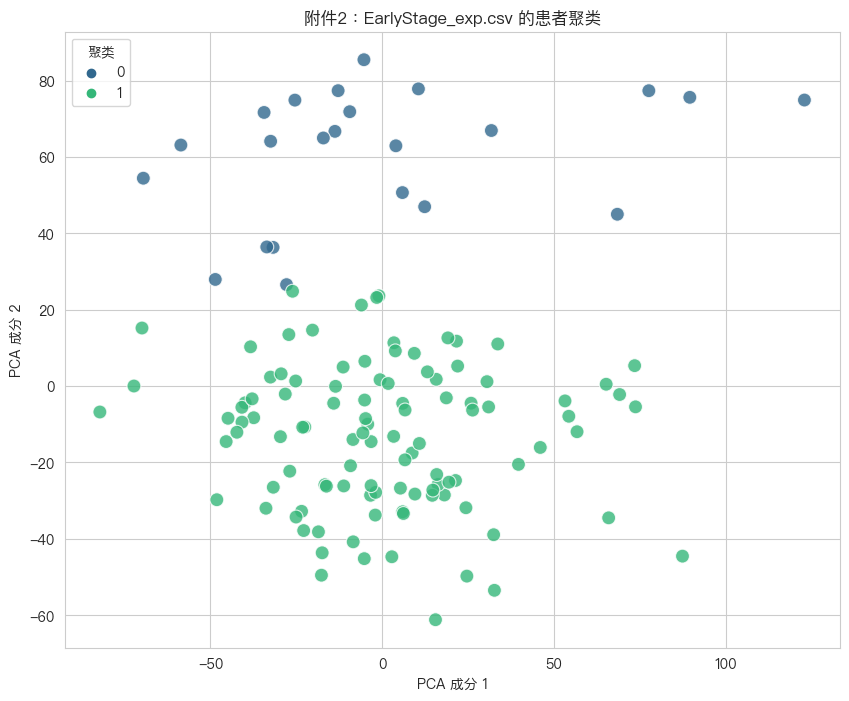

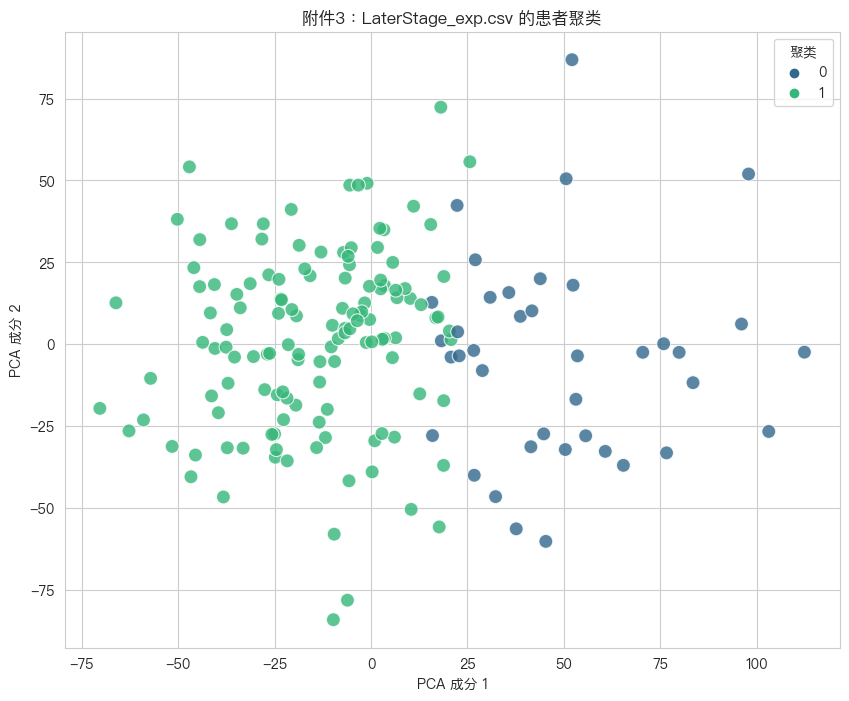

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

font_path = '/System/Library/Fonts/PingFang.ttc' 
plt.rcParams['font.sans-serif'] = ['PingFang HK']
plt.rcParams['axes.unicode_minus'] = False

def process_gene_expression_data(file_path, cluster_num=2):
    data = pd.read_csv(file_path)
    sample_names = data.columns[1:]
    genes = data.iloc[:, 0]
    data_values = data.drop(data.columns[0], axis=1).transpose()

    # 标准化数据
    scaler = StandardScaler()
    scaled_data_values = scaler.fit_transform(data_values)

    # k-means 聚类
    kmeans = KMeans(n_clusters=cluster_num, random_state=0).fit(scaled_data_values)
    clusters = kmeans.labels_

    # PCA 可视化
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data_values)

    # 绘图
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.8)
    plt.title(f'{file_path} 的患者聚类')
    plt.xlabel('PCA 成分 1')
    plt.ylabel('PCA 成分 2')
    plt.legend(title='聚类')
    plt.grid(True)
    plt.show()

    cluster_results = pd.DataFrame({'Sample Name': sample_names, 'Cluster': clusters})
    return cluster_results

# 处理两个数据集
early_stage_path = '附件2：EarlyStage_exp.csv'
later_stage_path = '附件3：LaterStage_exp.csv'

early_stage_results = process_gene_expression_data(early_stage_path)
later_stage_results = process_gene_expression_data(later_stage_path)

early_stage_results.to_csv('Clustered_Early_Stage_Results.csv', index=False)
later_stage_results.to_csv('Clustered_Later_Stage_Results.csv', index=False)


### 结论2:利用聚类算法划分亚群：使用 k-means 聚类对样本进行分群，将患者根据基因表达的模式分为不同的类别（亚群）。这种分群有助于从整体的异质性中区分出相对均质的子集，每个子集内部的基因表达模式更为一致。

### 结论3:差异基因分析：（R代码中的火山图）识别不同亚群之间的差异基因可，以看出两种亚群间找出差异基因个数占比很大。这一步骤我们k-means聚类提取的两个亚群是合理的。（早期晚期两类亚群的差异基因输出文件为：significant_genes_clusters_early.csv、significant_genes_clusters_later.csv）

### 问题：不同的患者之间存在着极强的异质性，如何在分析过程中尽可能的消除异质性的影响？ 
### 结论！！！：
1.数据标准化处理
开始分析之前，首先对基因表达数据进行数据标准化处理，这一步骤对于消除量纲的影响和不同样本间测量技术带来的偏差至关重要。

2.主成分分析（PCA）判定异质性
使用主成分分析（PCA）对标准化后的数据进行降维，旨在揭示数据中的主要变异来源。PCA结果通常通过散点图表示，样本点的分散程度可以直观反映出患者间的异质性。如果样本点未在低维空间中聚集，即可认为存在明显的异质性。

3.使用 k-means 聚类划分患者亚群
若PCA分析显示数据存在异质性，接下来使用 k-means 聚类算法将患者基于其基因表达模式划分为不同的亚群。选择合适的聚类数目通常基于业内标准如肘部方法（Elbow Method）或轮廓系数（Silhouette Score）来确定。

4.差异基因分析确认亚群划分的有效性
对每个亚群进行差异基因分析，找出在不同亚群间表达显著不同的基因。这一步验证了聚类的生物学意义，即不同亚群确实代表了基因表达上的显著差异。。

5.基于亚群的深入患者分析
最后，使用 k-means 的聚类结果将患者划分为特定的亚群进行进一步分析。这种分析考虑了亚群内的患者在基因表达上的相似性，从而在治疗和疾病进展分析中减少了由于异质性引起的变异和噪声。通过专注于每个亚群，可以更精确地理解和预测疾病的特性和患者的反应，为精准医疗提供支持。